**Column Details:**
- **State_Name**: Name of the Indian state where the crop was grown.  
- **District_Name**: Name of the district within the state.  
- **Crop_Year**: Year in which the crop was cultivated.  
- **Season**: Growing season of the crop (e.g., Kharif, Rabi, etc.).  
- **Crop**: Name of the crop grown (e.g., rice, wheat, maize, etc.).  
- **Area**: Total area (in hectares) under cultivation for the crop.  
- **Production**: Total production (in metric tons) of the crop in that district/year.  


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv("/content/crop_production.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [18]:
df.shape

(246091, 7)

In [19]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [20]:
df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,3730


Since it is difficult to predict the null values for production class we'll drop those rows.

In [21]:
print(df.shape)
df = df.dropna(axis=0)
print(df.shape)

(246091, 7)
(242361, 7)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


In [23]:
# Let's separate all the numerical and categorical columns
col = (df.dtypes == object)
obj_cols = (col[col] == True).index

col = (df.dtypes != object)
num_cols = (col[col] == True).index

obj_cols, num_cols

(Index(['State_Name', 'District_Name', 'Season', 'Crop'], dtype='object'),
 Index(['Crop_Year', 'Area', 'Production'], dtype='object'))

In [24]:
# Let's check for any inconsistency in object columns along with it's unique values
for col in df.columns:
    if df[col].dtype == object:
        print(col)
        print(df[col].unique(),"\n")

State_Name
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal'] 

District_Name
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DARRANG' 'D

We can see there is some inconsistency in Season column, it has a lot of spaces included alog with the data, let's trim it.

In [25]:
df['Season'] = df['Season'].apply(lambda x : x.strip())

In [26]:
df['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

Now it's better this way.

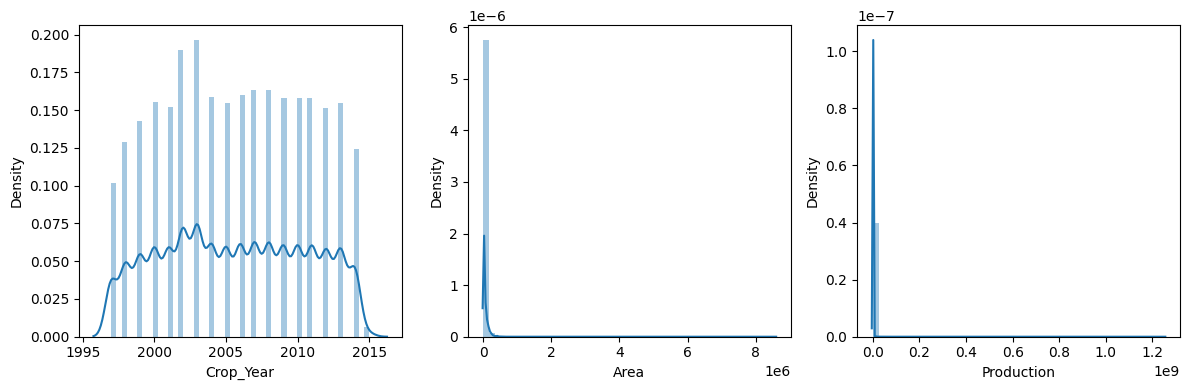

In [42]:
# Let's check the data distribution of all the numerical columns
plt.figure(figsize = (12, 4))
i = 0
for col in num_cols:
    i += 1
    plt.subplot(1, 3, i)
    sns.distplot(df[col])
    plt.tight_layout()
plt.show()

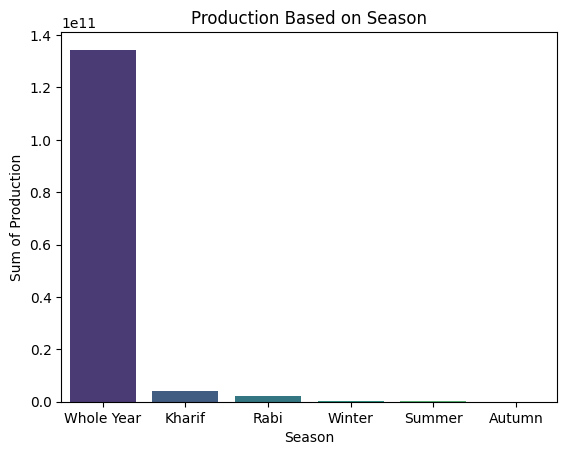

In [28]:
season_df = df.groupby('Season')['Production'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x = 'Season', y='Production', data = season_df, palette='viridis')
plt.title("Production Based on Season")
plt.ylabel("Sum of Production")
plt.show()

We can see the most amout of production is done over the whole year.

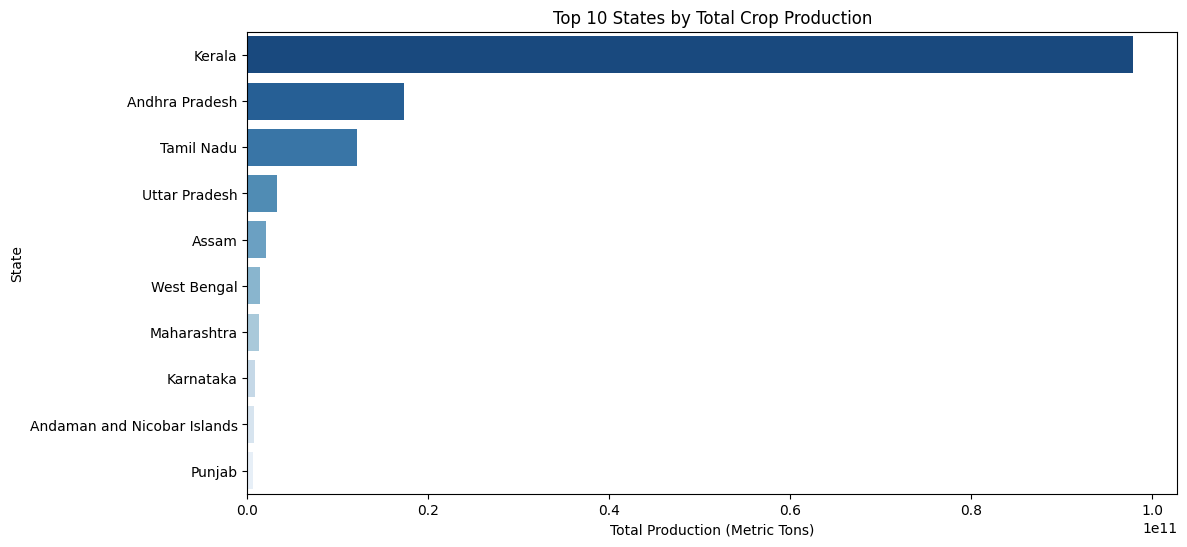

In [29]:
state_production = df.groupby("State_Name")["Production"].sum().reset_index().sort_values(by="Production", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x="Production", y="State_Name", data=state_production.head(10), palette="Blues_r")
plt.title("Top 10 States by Total Crop Production")
plt.xlabel("Total Production (Metric Tons)")
plt.ylabel("State")
plt.show()


* Apparantly Kerala is the state with highest production.
* Since kerala is the state with highest production.

Let's explore more about the production in each district of kerala.

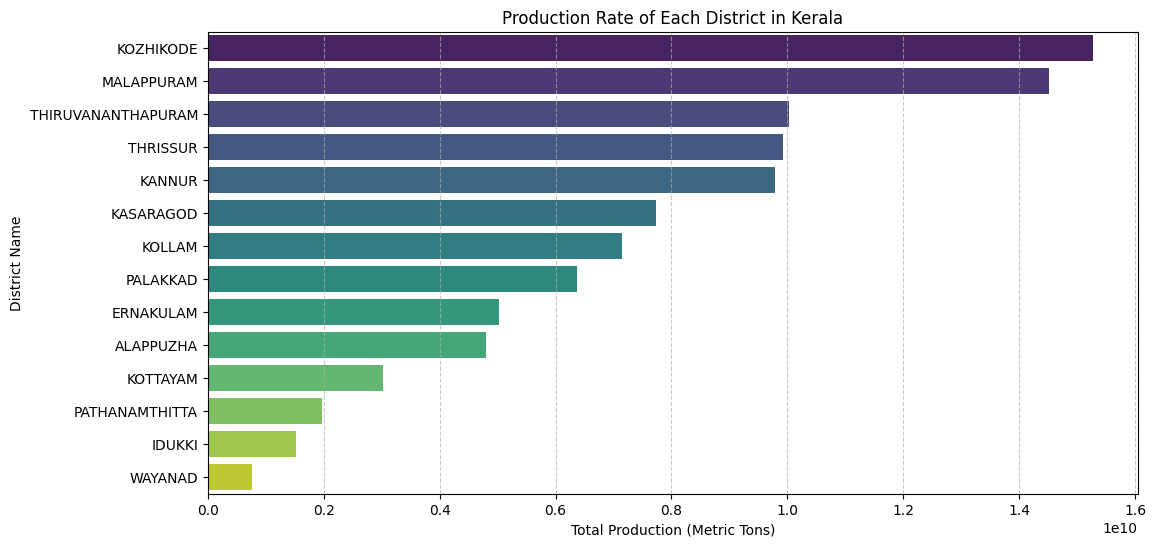

In [30]:
kerala_df = df[df['State_Name'] == 'Kerala']
kerala_production = kerala_df.groupby('District_Name')['Production'].sum().reset_index()
kerala_production = kerala_production.sort_values(by="Production", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Production", y="District_Name", data=kerala_production, palette="viridis")
plt.xlabel("Total Production (Metric Tons)")
plt.ylabel("District Name")
plt.title("Production Rate of Each District in Kerala")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

* Apparantly Kozhikode and Malappuram are the 2 best productive district of Kerala.
* Wayanad is the least productive state in the Kerala.

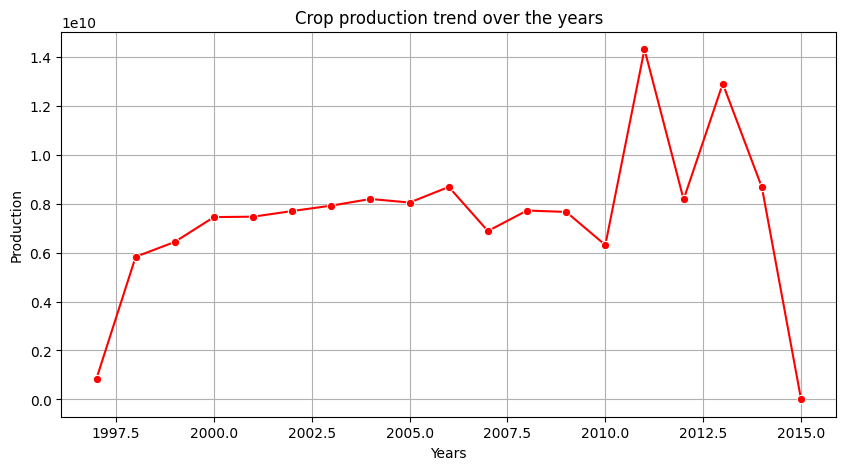

In [31]:
# Let's find the trends of production over the years
yearly_prod = df.groupby('Crop_Year')['Production'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x = 'Crop_Year', y = "Production", data = yearly_prod, marker = 'o', color = 'r')
plt.title("Crop production trend over the years")
plt.xlabel('Years')
plt.ylabel("Production")
plt.grid(True)

We can infer here:
* The Least production was done on the year 2015
* The tred suddenly spiked in the year 2011 and later we can observe some fluctuations
* Finally in the year 2015 it dropped significantly, infact lowest in the entire dataset.
* The trend was kind of stable from 1998 to 2006.

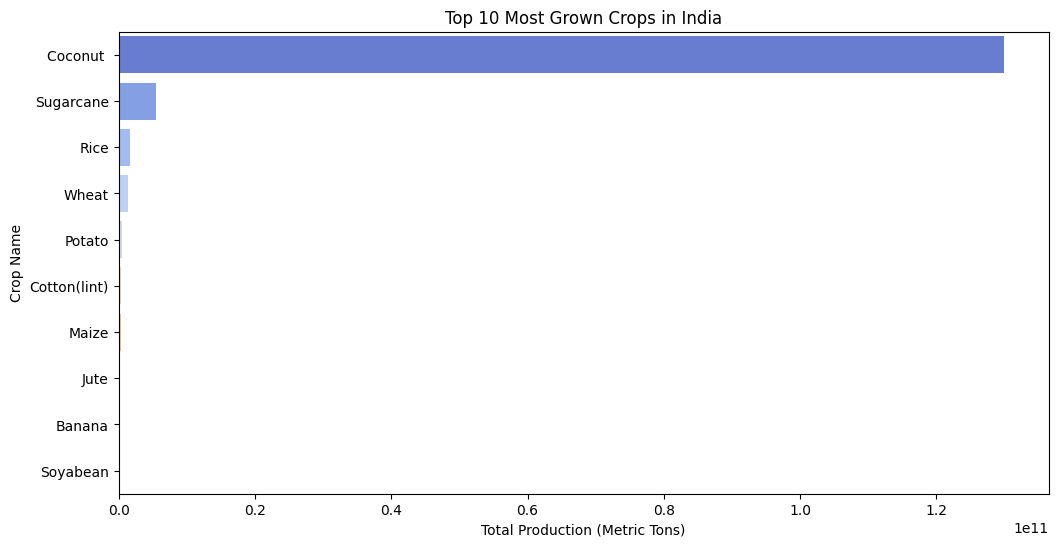

In [32]:
# Let's check the most grown crop during all the time frame
crop_production = df.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x="Production", y="Crop", data=crop_production.head(10), palette="coolwarm")
plt.title("Top 10 Most Grown Crops in India")
plt.xlabel("Total Production (Metric Tons)")
plt.ylabel("Crop Name")
plt.show()

* These are the top 10 crop yielded in Kerala.
* Coconut is the most produced crop in Kerala.

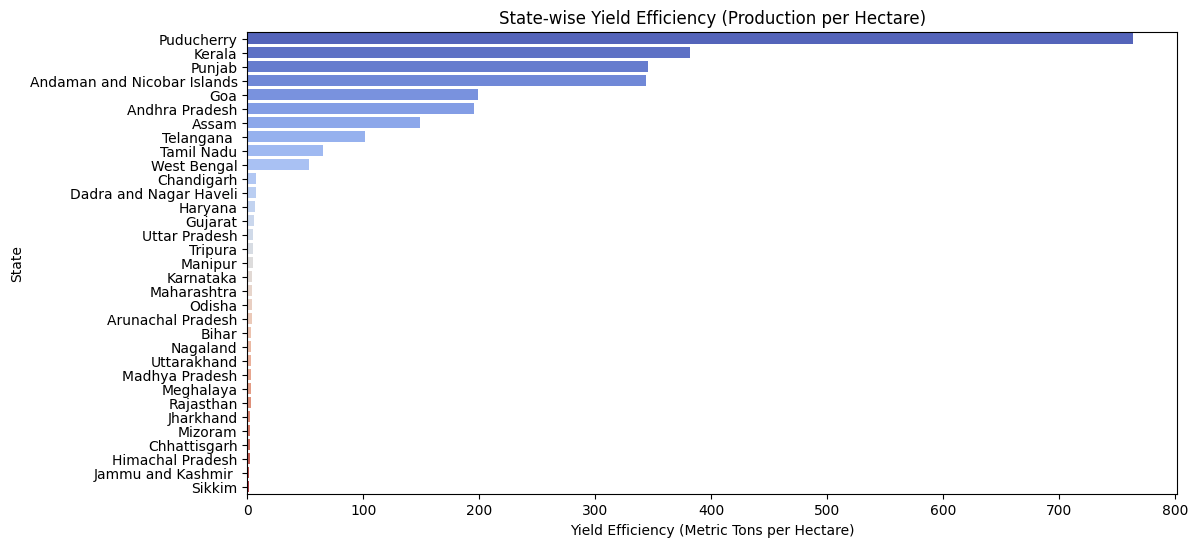

In [33]:
df["Yield_Efficiency"] = df["Production"] / df["Area"]
state_efficiency = df.groupby("State_Name")["Yield_Efficiency"].mean().reset_index().sort_values(by="Yield_Efficiency", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Yield_Efficiency", y="State_Name", data=state_efficiency, palette="coolwarm")
plt.title("State-wise Yield Efficiency (Production per Hectare)")
plt.xlabel("Yield Efficiency (Metric Tons per Hectare)")
plt.ylabel("State")
plt.show()

* Here we can see Kerala state has high production but lack in efficiency meaning more land is used inefficiently
* Where as Puducherry state has better efficiency than kerala.

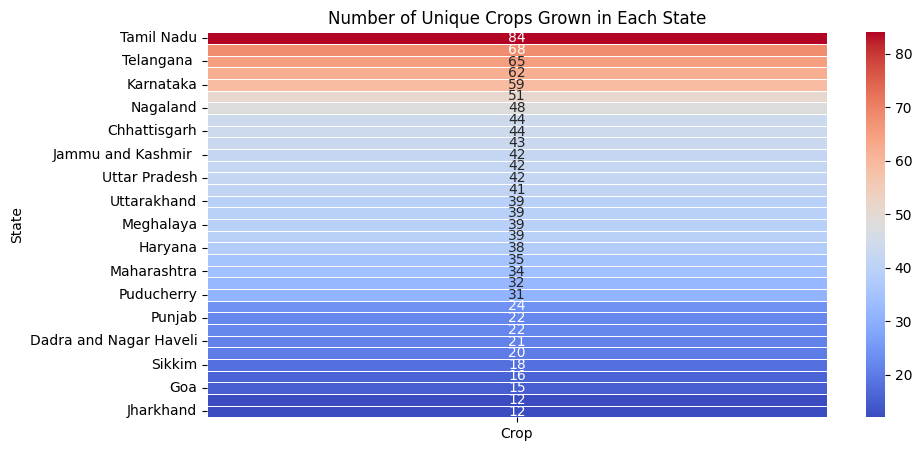

In [34]:
# Getting a jist of diverse crops grown in all the states
state_crop_count = df.groupby("State_Name")["Crop"].nunique().reset_index().sort_values(by = 'Crop', ascending=False)
plt.figure(figsize=(10, 5))
sns.heatmap(state_crop_count.set_index("State_Name"), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Number of Unique Crops Grown in Each State")
plt.ylabel("State")
plt.show()

* Tamil Nadu has the highest diverse crops production
* Jharkhand has the lowest

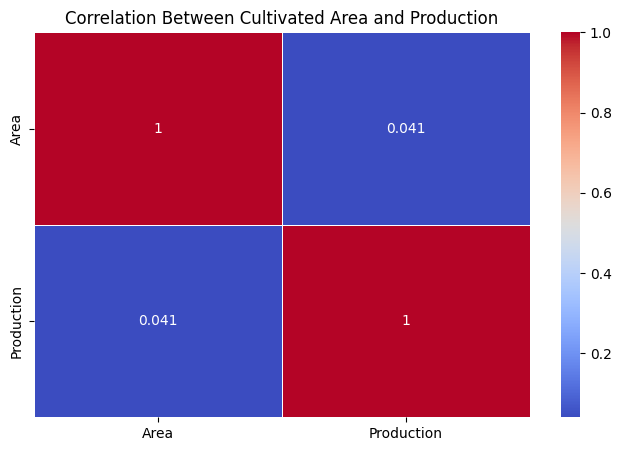

In [35]:
# Let's check the correlation between Cultivated Are and Production
plt.figure(figsize=(8, 5))
sns.heatmap(df[["Area", "Production"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Cultivated Area and Production")
plt.show()


* Apparantly there is no correlation between Cultivated Are and Production
* This indicates that production do not get affected by the area.

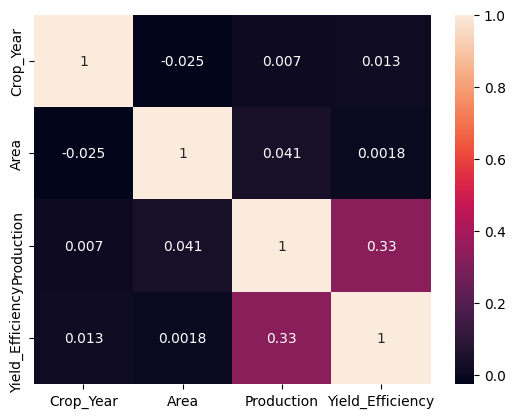

In [36]:
# Let's check the correlation between all the numerical columns now
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

Everything looks good let's proceed further with model building and evaluation.

In [37]:
# Converting categorical to numerical
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtypes == object:
        df[col] = encoder.fit_transform(df[col])
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield_Efficiency
0,0,427,2000,1,2,1254.0,2000.0,1.594896
1,0,427,2000,1,74,2.0,1.0,0.500000
2,0,427,2000,1,95,102.0,321.0,3.147059
3,0,427,2000,4,7,176.0,641.0,3.642045
4,0,427,2000,4,22,720.0,165.0,0.229167


In [38]:
# Feature Extraction
x = df.drop('Production', axis=1)   # all the features
y = df['Production']                # target variable
x.shape, y.shape

((242361, 7), (242361,))

In [39]:
# Let's separate the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((193888, 7), (48473, 7), (193888,), (48473,))

In [40]:
# Now Let's standardize all the columns for faster training.
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [41]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Yield_Efficiency'],
      dtype='object')